In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/ugurarabaci/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 24.55 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os 
dosya_konumu= '/content/datasets/Data'
train_konumu= os.path.join(dosya_konumu, 'train')
test_konumu= os.path.join(dosya_konumu, 'test')
train_covid_konumu= os.path.join(train_konumu, 'COVID19')
train_normal_konumu= os.path.join(train_konumu, 'NORMAL')
test_covid_konumu= os.path.join(test_konumu, 'COVID19')
test_normal_konumu= os.path.join(test_konumu, 'NORMAL')



In [4]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(224,224),
                                                  subset='training',
                                                  batch_size=32,
                                                  class_mode= 'binary')


validation_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(224,224),
                                                  subset='validation',
                                                  batch_size=32,
                                                  class_mode= 'binary')


test_generator=test_datagen.flow_from_directory(test_konumu ,
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  class_mode= 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [27]:
from tensorflow.keras.optimizers import Adam
import time




base_model = ResNet50(include_top=False, weights='imagenet')
x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model= Model(inputs=base_model.input, outputs=predictions)

for layers in base_model.layers:
  layers.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

train_data=ImageDataGenerator().flow_from_directory(train_konumu ,
                                                  target_size=(224,224))

test_data=ImageDataGenerator().flow_from_directory(test_konumu ,
                                                  target_size=(224,224))

batch_size=32

hist=model.fit_generator(train_data,
                         steps_per_epoch=1600//batch_size,
                         epochs=5,
                         validation_data=test_data,
                         validation_steps=10)

Found 1811 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
50/50 [==============================] - 349s 7s/step - loss: 1.3826 - accuracy: 0.8264 - val_loss: 0.1049 - val_accuracy: 0.9750
Epoch 2/5
50/50 [==============================] - 340s 7s/step - loss: 0.0211 - accuracy: 0.9919 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 3/5
50/50 [==============================] - 346s 7s/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.0278 - val_accuracy: 0.9906
Epoch 4/5
50/50 [==============================] - 351s 7s/step - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.0145 - val_accuracy: 0.9937
Epoch 5/5
50/50 [==============================] - 346s 7s/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0029 - val_accuracy: 1.0000


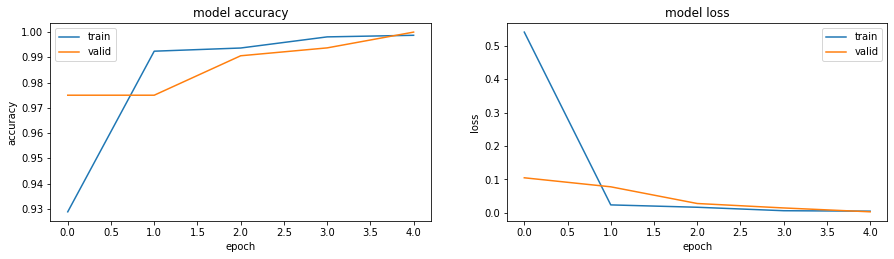

In [31]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(hist.history["accuracy"])  
plt.plot(hist.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()